# 1st Part of the Assesment

In [1]:
# Importing the mandatory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the data from the csv file

data = pd.read_csv('/Users/karthik_swasaka/Downloads/data_pts.csv')

In [3]:
# top 5 rows from the dataframe

data.head()

,0.075219688,-0.134484277
0,-0.010374,-0.195679
1,0.090225,0.141263
2,0.117467,0.081682
3,-0.152645,0.042330
4,0.009097,-0.215813


In [5]:
# shape of the dataframe
data.shape

(294, 2)

In [6]:
# giving the names to cloumns

data.columns = ['X','Y']

In [7]:
# top5 rows checking after givng the column names

data.head()

,X,Y
0,-0.010374,-0.195679
1,0.090225,0.141263
2,0.117467,0.081682
3,-0.152645,0.042330
4,0.009097,-0.215813


In [8]:
# Checking the null values

data.isnull().sum()

X    0
Y    0
dtype: int64

Whcih means there is no null values in the dataframe.

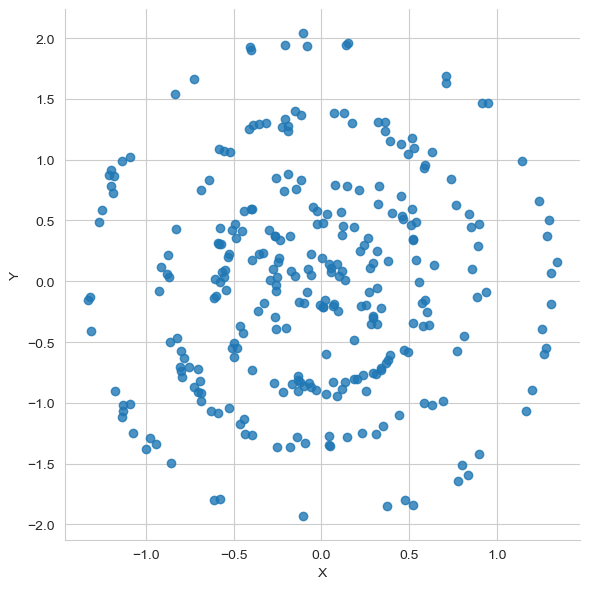

In [10]:
# data visulization with scatterplot

sns.set_style('whitegrid')
sns.lmplot(x = 'X', y = 'Y',data = data,fit_reg = False,height = 6)

In [12]:
# Data Preprocessing: scaling the values beofre clustering
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-Means Silhouette Score: 0.36228153947277775
Cluster Sizes (K-Means):
Cluster 0: 68 points
Cluster 1: 39 points
Cluster 2: 53 points
Cluster 3: 86 points
Cluster 4: 48 points

Agglomerative Clustering Silhouette Score: 0.311713661466594
Cluster Sizes (Agglomerative Clustering):
Cluster 0: 90 points
Cluster 1: 42 points
Cluster 2: 55 points
Cluster 3: 32 points
Cluster 4: 75 points

DBSCAN Silhouette Score: 0.054882869559255795
Cluster Sizes (DBSCAN):
Noise: 16 points
Cluster 0: 237 points
Cluster 1: 10 points
Cluster 2: 10 points
Cluster 3: 9 points
Cluster 4: 7 points
Cluster 5: 5 points

Spectral Clustering Silhouette Score: 0.27976498948691253
Cluster Sizes (Spectral Clustering):
Cluster 0: 161 points
Cluster 1: 20 points
Cluster 2: 32 points
Cluster 3: 36 points
Cluster 4: 45 points


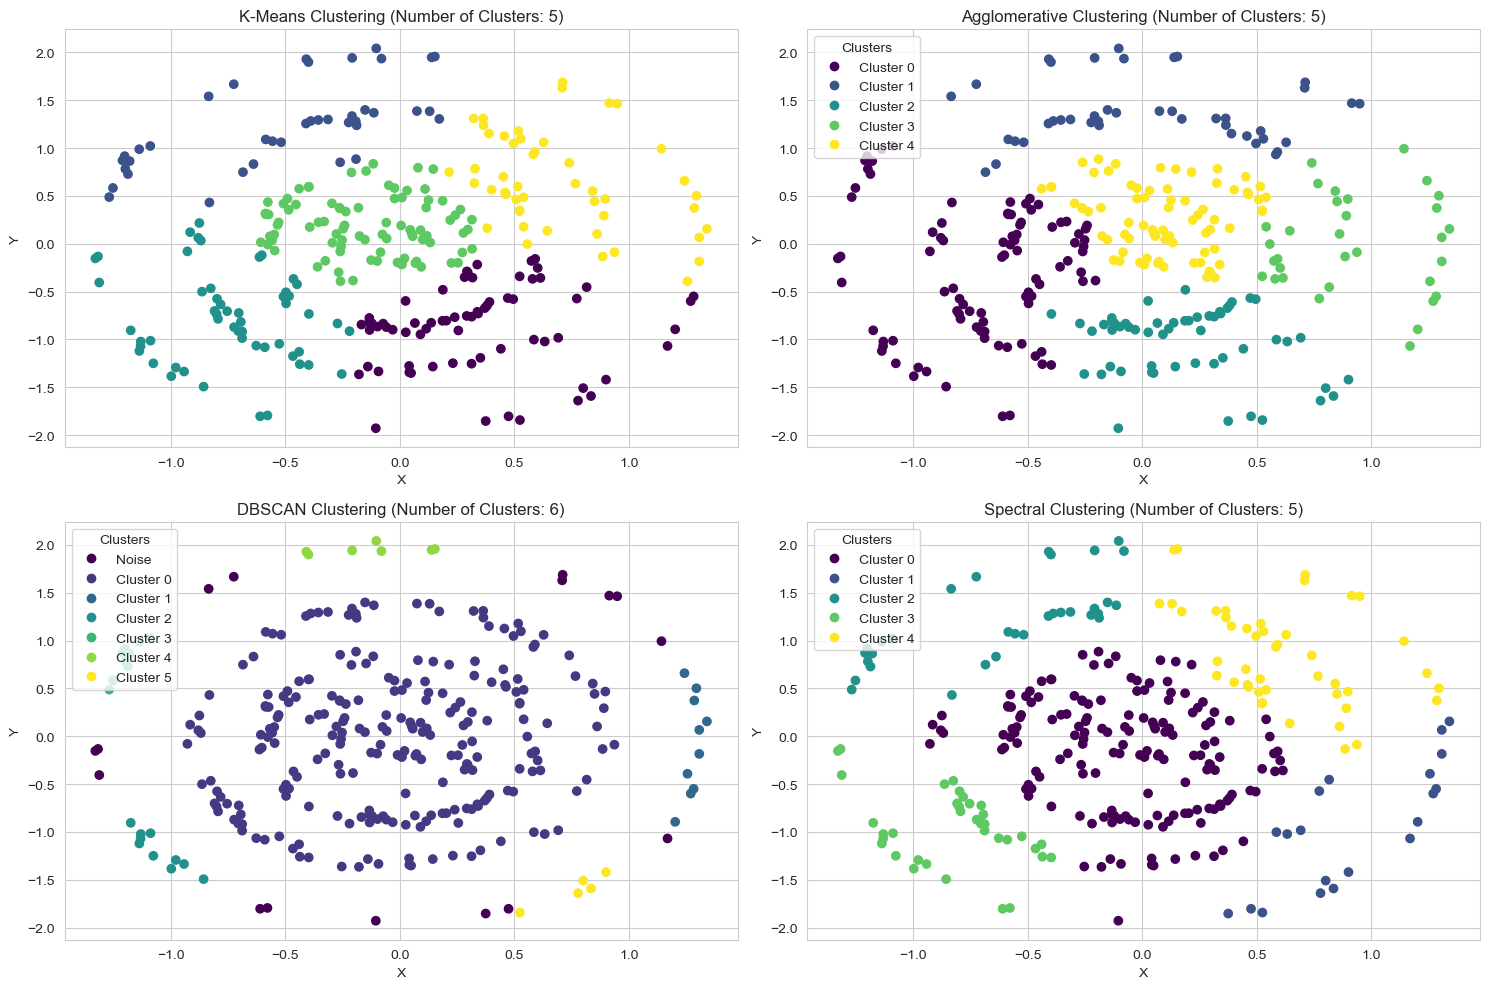

In [14]:
# Clustering

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.metrics import silhouette_score

# K-Means
kmeans = KMeans(n_clusters=5)
kmeans_labels = kmeans.fit_predict(scaled_data)
kmeans_score = silhouette_score(scaled_data, kmeans_labels)

# Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_cluster.fit_predict(scaled_data)
agg_score = silhouette_score(scaled_data, agg_labels)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)
dbscan_silhouette_score = silhouette_score(scaled_data, dbscan_labels)

# Spectral Clustering
spectral = SpectralClustering(n_clusters=5)
spectral_labels = spectral.fit_predict(scaled_data)
spectral_score = silhouette_score(scaled_data, spectral_labels)

# Calculate the number of data points in each cluster for K-Means
cluster_sizes_kmeans = {}
for cluster in range(kmeans.n_clusters):
    cluster_sizes_kmeans[cluster] = np.sum(kmeans_labels == cluster)

# Calculate the number of data points in each cluster for Agglomerative Clustering
cluster_sizes_agg = {}
for cluster in range(agg_cluster.n_clusters_):
    cluster_sizes_agg[cluster] = np.sum(agg_labels == cluster)

# Calculate the number of data points in each cluster for DBSCAN
unique_labels_dbscan = np.unique(dbscan_labels)
num_clusters_dbscan = len(unique_labels_dbscan) - (1 if -1 in dbscan_labels else 0)
cluster_sizes_dbscan = {}

for label in unique_labels_dbscan:
    if label == -1:
        cluster_sizes_dbscan["Noise"] = np.sum(dbscan_labels == label)
    else:
        cluster_sizes_dbscan[f'Cluster {label}'] = np.sum(dbscan_labels == label)

# Calculate the number of data points in each cluster for Spectral Clustering
unique_labels_spectral = np.unique(spectral_labels)
num_clusters_spectral = len(unique_labels_spectral)
cluster_sizes_spectral = {}

for label in unique_labels_spectral:
    cluster_sizes_spectral[f'Cluster {label}'] = np.sum(spectral_labels == label)

# Visualize K-Means clustering results
plt.figure(figsize=(15, 10))

# Plot the data points for K-Means
plt.subplot(2, 2, 1)
plt.scatter(data['X'], data['Y'], c=kmeans_labels, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'K-Means Clustering (Number of Clusters: {kmeans.n_clusters})')

# Visualize Agglomerative Clustering results
plt.subplot(2, 2, 2)

# Plot the data points for Agglomerative Clustering
scatter_agg = plt.scatter(data['X'], data['Y'], c=agg_labels, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Agglomerative Clustering (Number of Clusters: {agg_cluster.n_clusters_})')

# Create a legend for Agglomerative Clustering
legend_labels_agg = [f'Cluster {cluster}' for cluster in range(agg_cluster.n_clusters_)]
legend_agg = plt.legend(handles=scatter_agg.legend_elements()[0], labels=legend_labels_agg, loc='upper left', title='Clusters')
plt.setp(legend_agg.get_title(), fontsize=10)

# Visualize DBSCAN clustering results
plt.subplot(2, 2, 3)

# Plot the data points for DBSCAN
scatter_dbscan = plt.scatter(data['X'], data['Y'], c=dbscan_labels, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'DBSCAN Clustering (Number of Clusters: {num_clusters_dbscan})')

# Create a legend for DBSCAN
legend_labels_dbscan = [f'Cluster {label}' if label != -1 else 'Noise' for label in unique_labels_dbscan]
legend_dbscan = plt.legend(handles=scatter_dbscan.legend_elements()[0], labels=legend_labels_dbscan, loc='upper left', title='Clusters')
plt.setp(legend_dbscan.get_title(), fontsize=10)

# Visualize Spectral Clustering results
plt.subplot(2, 2, 4)

# Plot the data points for Spectral Clustering
scatter_spectral = plt.scatter(data['X'], data['Y'], c=spectral_labels, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Spectral Clustering (Number of Clusters: {num_clusters_spectral})')

# Create a legend for Spectral Clustering
legend_labels_spectral = [f'Cluster {label}' for label in unique_labels_spectral]
legend_spectral = plt.legend(handles=scatter_spectral.legend_elements()[0], labels=legend_labels_spectral, loc='upper left', title='Clusters')
plt.setp(legend_spectral.get_title(), fontsize=10)

plt.tight_layout()

# Print Silhouette Scores and cluster sizes for all methods
print("K-Means Silhouette Score:", kmeans_score)
print('Cluster Sizes (K-Means):')
for cluster, size in cluster_sizes_kmeans.items():
    print(f'Cluster {cluster}: {size} points')

print("\nAgglomerative Clustering Silhouette Score:", agg_score)
print('Cluster Sizes (Agglomerative Clustering):')
for cluster, size in cluster_sizes_agg.items():
    print(f'Cluster {cluster}: {size} points')

print("\nDBSCAN Silhouette Score:", dbscan_silhouette_score)
print('Cluster Sizes (DBSCAN):')
for label, size in cluster_sizes_dbscan.items():
    print(f'{label}: {size} points')

print("\nSpectral Clustering Silhouette Score:", spectral_score)
print('Cluster Sizes (Spectral Clustering):')
for label, size in cluster_sizes_spectral.items():
    print(f'{label}: {size} points')

plt.show()


# 2nd part of the assesment

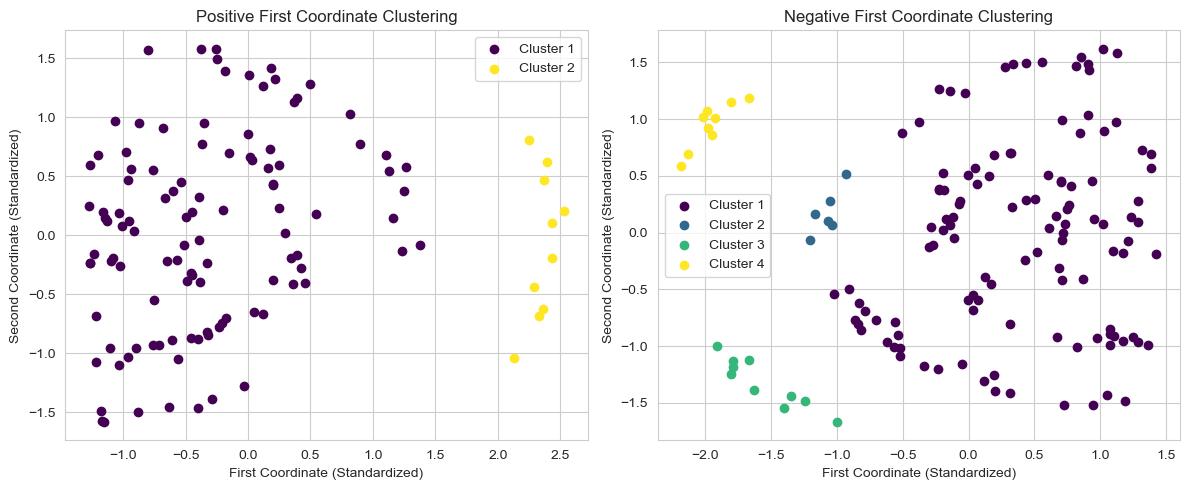

Positive First Coordinate Clustering:
Number of Clusters: 2
Cluster Sizes:
Cluster 1: 108 points
Cluster 2: 10 points

Negative First Coordinate Clustering:
Number of Clusters: 4
Cluster Sizes:
Cluster 1: 116 points
Cluster 2: 6 points
Cluster 3: 10 points
Cluster 4: 9 points


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/karthik_swasaka/Downloads/data_pts.csv')

# Separate points into two groups based on the sign of the first coordinate
positive_coords = df[df.iloc[:, 0] > 0]
negative_coords = df[df.iloc[:, 0] < 0]

# Standardize the data for both groups
scaler = StandardScaler()
positive_standardized = scaler.fit_transform(positive_coords)
negative_standardized = scaler.fit_transform(negative_coords)

# DBSCAN clustering for the positive coordinate group
eps = 0.5  # You can adjust the neighborhood distance
min_samples = 5  # You can adjust the minimum number of samples in a cluster
dbscan_positive = DBSCAN(eps=eps, min_samples=min_samples)
clusters_positive = dbscan_positive.fit_predict(positive_standardized)

# DBSCAN clustering for the negative coordinate group
dbscan_negative = DBSCAN(eps=eps, min_samples=min_samples)
clusters_negative = dbscan_negative.fit_predict(negative_standardized)

# Extract the number of clusters for both groups
num_clusters_positive = len(set(clusters_positive)) - (1 if -1 in clusters_positive else 0)
num_clusters_negative = len(set(clusters_negative)) - (1 if -1 in clusters_negative else 0)

# Count the number of points in each cluster for both groups (excluding noise points, labeled as -1)
cluster_sizes_positive = dict(Counter(clusters_positive))
cluster_sizes_negative = dict(Counter(clusters_negative))
cluster_sizes_positive.pop(-1, None)  
cluster_sizes_negative.pop(-1, None)  

# Generate cluster colors for both groups
colors_positive = plt.cm.viridis(np.linspace(0, 1, num_clusters_positive))
colors_negative = plt.cm.viridis(np.linspace(0, 1, num_clusters_negative))

# Plot the clustered data with different colors for both groups
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for i in range(num_clusters_positive):
    cluster_indices = np.where(clusters_positive == i)[0]
    cluster_data = positive_standardized[cluster_indices]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=[colors_positive[i]], label=f'Cluster {i + 1}')
plt.xlabel('First Coordinate (Standardized)')
plt.ylabel('Second Coordinate (Standardized)')
plt.title('Positive First Coordinate Clustering')
plt.legend()

plt.subplot(1, 2, 2)
for i in range(num_clusters_negative):
    cluster_indices = np.where(clusters_negative == i)[0]
    cluster_data = negative_standardized[cluster_indices]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=[colors_negative[i]], label=f'Cluster {i + 1}')
plt.xlabel('First Coordinate (Standardized)')
plt.ylabel('Second Coordinate (Standardized)')
plt.title('Negative First Coordinate Clustering')
plt.legend()

plt.tight_layout()
plt.show()

print('Positive First Coordinate Clustering:')
print(f'Number of Clusters: {num_clusters_positive}')
print('Cluster Sizes:')
for cluster, size in cluster_sizes_positive.items():
    print(f'Cluster {cluster + 1}: {size} points')

print('\nNegative First Coordinate Clustering:')
print(f'Number of Clusters: {num_clusters_negative}')
print('Cluster Sizes:')
for cluster, size in cluster_sizes_negative.items():
    print(f'Cluster {cluster + 1}: {size} points')
